# Iterators

`for` loops "lower" to `while` loops plus calls to the `iterate` function:

```jl
for i in iter   # or  "for i = iter" or "for i ∈ iter"
    # body
end
```

internally works the same as:

```jl
next = iterate(iter)
while next !== nothing
    (i, state) = next
    # body
    next = iterate(iter, state)
end
```

The same applies to comprehensions and generators.

Note `nothing` is a singleton value (the only value of its type `Nothing`) used by convention when there is no value to return (a bit like `void` in C). For example 

In [2]:
print("hello")

hello

In [3]:
A = ['a','b','c'];

In [4]:
iterate(A)

('a', 2)

In [5]:
iterate(A, 2)

('b', 3)

In [6]:
iterate(A, 3)

('c', 4)

In [8]:
iterate(A, 4)

Iteration is also used by "destructuring" assignment:

In [9]:
x, y = A

3-element Array{Char,1}:
 'a'
 'b'
 'c'

In [10]:
x

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [11]:
y

'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

Yet another user of this "iteration protocol" is so-called argument "splatting":

In [ ]:
string(A)

In [13]:
string('a','b','c')

"abc"

In [12]:
string(A...)

"abc"

## Iteration utilities

`collect` gives you all elements of an iterator as an array.
Comprehensions are actually equivalent to calling `collect` on a generator.

In [14]:
collect(pairs(A))

3-element Array{Pair{Int64,Char},1}:
 1 => 'a'
 2 => 'b'
 3 => 'c'

In [15]:
iterate(pairs(A))

(1 => 'a', 1)

In [18]:
collect(zip(100:110,A,pairs(A)))

DimensionMismatch: DimensionMismatch("dimensions must match")

In [ ]:
for (z, c, pair) in zip(100:102, A, pairs(A))
    

In [19]:
collect(Iterators.product(A,10:12))

3×3 Array{Tuple{Char,Int64},2}:
 ('a', 10)  ('a', 11)  ('a', 12)
 ('b', 10)  ('b', 11)  ('b', 12)
 ('c', 10)  ('c', 11)  ('c', 12)

Some other favorites to experiment with. These are in the built-in `Iterators` module:
- `enumerate`
- `rest`
- `take`
- `drop`
- `product`
- `flatten`
- `partition`

Some iterators are infinite!
- `countfrom`
- `repeated`
- `cycle`

In [20]:
I = zip(Iterators.cycle(0:1), Iterators.flatten([[2,3],[4,5]]))

Base.Iterators.Zip2{Base.Iterators.Cycle{UnitRange{Int64}},Base.Iterators.Flatten{Array{Array{Int64,1},1}}}(Base.Iterators.Cycle{UnitRange{Int64}}(0:1), Base.Iterators.Flatten{Array{Array{Int64,1},1}}(Array{Int64,1}[[2, 3], [4, 5]]))

In [21]:
collect(I)

4-element Array{Tuple{Int64,Int64},1}:
 (0, 2)
 (1, 3)
 (0, 4)
 (1, 5)

In [24]:
collect(Iterators.product(I,A))

12-element Array{Tuple{Tuple{Int64,Int64},Char},1}:
 ((0, 2), 'a')
 ((1, 3), 'a')
 ((0, 4), 'a')
 ((1, 5), 'a')
 ((0, 2), 'b')
 ((1, 3), 'b')
 ((0, 4), 'b')
 ((1, 5), 'b')
 ((0, 2), 'c')
 ((1, 3), 'c')
 ((0, 4), 'c')
 ((1, 5), 'c')

In [25]:
string(I...)

"(0, 2)(1, 3)(0, 4)(1, 5)"

## Defining iterators

In [26]:
struct SimpleRange
    lo::Int
    hi::Int
end

In [27]:
Base.iterate(r::SimpleRange, state = r.lo) =
    state > r.hi ? nothing : (state, state+1)

In [28]:
Base.length(r::SimpleRange) = r.hi-r.lo+1

In [30]:
collect(zip(Iterators.cycle(["hi","bye"]),SimpleRange(2,8)))

7-element Array{Tuple{String,Any},1}:
 ("hi", 2) 
 ("bye", 3)
 ("hi", 4) 
 ("bye", 5)
 ("hi", 6) 
 ("bye", 7)
 ("hi", 8) 

In [31]:
x, y = SimpleRange(2,8)

SimpleRange(2, 8)

In [32]:
x

2

In [33]:
y

3

In [34]:
string(SimpleRange(2,8)...)

"2345678"

## Iterator traits

For many algorithms, it's useful to know certain properties of an iterator up front.

The most useful is whether an iterator has a fixed, known length.

In [36]:
Base.IteratorSize([1])

Base.HasShape{1}()

In [35]:
Base.IteratorSize(Iterators.repeated(1))

Base.IsInfinite()

In [37]:
Base.IteratorSize(eachline(open("/dev/null")))

Base.SizeUnknown()

## Exercise

Define an iterator giving the first N fibonacci numbers.

In [ ]:
f = Fibs(10)
collect(f) == [1,1,2,3,5,8,13,21,34,55]

In [38]:
struct Fibonacci
    n::Int
end

In [45]:
function Base.iterate(f::Fibonacci, (prev,curr,count) = (0,0,0))
#    prev, curr, count = state
    if count >= f.n
        return nothing
    elseif count < 1
        return (1, (0, 1, 1))
    else
        return (prev + curr,
                (curr, prev+curr, count+1))
    end
end

In [46]:
for n in Fibonacci(10)
    println(n)
end

1
1
2
3
5
8
13
21
34
55


In [50]:
a, b, n = 1, 1, 1
while true
    global a, b
    println(a)
    a, b = b, a+b
end

1
1
2
3
5
8
13
21
34
55


In [51]:
struct Fib
    a::Int
    b::Int
end

Base.IteratorSize(::Type{Fib}) = Base.IsInfinite()

Base.iterate(f::Fib, (a, b) = (f.a, f.b)) = a, (b, a+b)

In [56]:
Iterators.take(Fib(3, 4), 25) |> collect

25-element Array{Any,1}:
      3
      4
      7
     11
     18
     29
     47
     76
    123
    199
    322
    521
    843
   1364
   2207
   3571
   5778
   9349
  15127
  24476
  39603
  64079
 103682
 167761
 271443

## Index iterators

In [57]:
A = rand(3,5)

3×5 Array{Float64,2}:
 0.355632  0.985793  0.489379  0.624686  0.712901
 0.413506  0.324862  0.822389  0.271306  0.764273
 0.428701  0.239999  0.332635  0.72918   0.533587

In [58]:
eachindex(A)

Base.OneTo(15)

In [59]:
A[14]

0.7642729376382325

In [60]:
keys(A)

3×5 CartesianIndices{2,Tuple{Base.OneTo{Int64},Base.OneTo{Int64}}}:
 CartesianIndex(1, 1)  CartesianIndex(1, 2)  …  CartesianIndex(1, 5)
 CartesianIndex(2, 1)  CartesianIndex(2, 2)     CartesianIndex(2, 5)
 CartesianIndex(3, 1)  CartesianIndex(3, 2)     CartesianIndex(3, 5)

In [61]:
Av = view(A, [1,3], [1,2,5])

2×3 view(::Array{Float64,2}, [1, 3], [1, 2, 5]) with eltype Float64:
 0.355632  0.985793  0.712901
 0.428701  0.239999  0.533587

In [62]:
A[[1,3],[1,2,5]]

2×3 Array{Float64,2}:
 0.355632  0.985793  0.712901
 0.428701  0.239999  0.533587

In [63]:
eachindex(Av)

2×3 CartesianIndices{2,Tuple{Base.OneTo{Int64},Base.OneTo{Int64}}}:
 CartesianIndex(1, 1)  CartesianIndex(1, 2)  CartesianIndex(1, 3)
 CartesianIndex(2, 1)  CartesianIndex(2, 2)  CartesianIndex(2, 3)

In [64]:
i = first(eachindex(Av))

CartesianIndex(1, 1)

In [65]:
Av[i]

0.3556318479553726

### Example: $3\times 3\times \dots \times3$ boxcar filter (from a blog post by Tim Holy)

In [66]:
function boxcar3(A::AbstractArray)
    out = similar(A)
    R = keys(A) #CartesianIndices(size(A))
    I1, Iend = first(R), last(R)
    for I in R
        n, s = 0, zero(eltype(out))
        for J in CartesianIndices(map(:, max(I1, I-I1).I, min(Iend, I+I1).I))
            s += A[J]
            n += 1
        end
        out[I] = s/n
    end
    out
end

boxcar3 (generic function with 1 method)

In [67]:
using Images

In [68]:
A = rand(256,256);

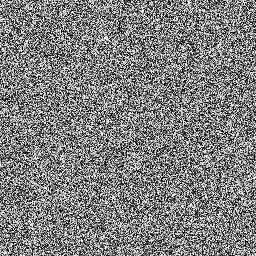

In [69]:
Gray.(A)

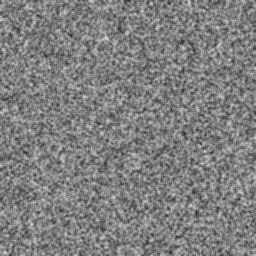

In [70]:
Gray.(boxcar3(A))

In [73]:
function sumalongdims!(B, A)
    # It's assumed that B has size 1 along any dimension that we're summing
    fill!(B, 0)
    Bmax = CartesianIndex(size(B))
    for I in CartesianIndices(size(A))
        B[min(Bmax,I)] += A[I]
    end
    B
end

sumalongdims! (generic function with 1 method)

In [74]:
B = zeros(1, 256)

1×256 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [75]:
sumalongdims!(B, A)

1×256 Array{Float64,2}:
 130.407  126.205  129.745  127.936  …  119.43  123.584  125.25  130.279

In [76]:
reduce(+,A,dims=(1,))

1×256 Array{Float64,2}:
 130.407  126.205  129.745  127.936  …  119.43  123.584  125.25  130.279

`CartesianIndices` and other "N-d" iterators have a shape that propagates through generators.

In [ ]:
[1 for i in CartesianIndices((2,3))]

In [77]:
B = rand(5,5)

5×5 Array{Float64,2}:
 0.407213  0.362823  0.689505  0.495885  0.906286
 0.115172  0.803621  0.256211  0.511838  0.767333
 0.467707  0.450859  0.409984  0.987388  0.432633
 0.954623  0.22016   0.689191  0.267774  0.517147
 0.780415  0.65076   0.147634  0.791455  0.781208

In [78]:
view(B,CartesianIndices((2,3)))

2×3 view(::Array{Float64,2}, CartesianIndex{2}[CartesianIndex(1, 1) CartesianIndex(1, 2) CartesianIndex(1, 3); CartesianIndex(2, 1) CartesianIndex(2, 2) CartesianIndex(2, 3)]) with eltype Float64:
 0.407213  0.362823  0.689505
 0.115172  0.803621  0.256211

## Exercise: CartesianIndex life!

- Write a function `neighborhood(A::Array, I::CartesianIndex)` that returns a view of the 3x3 neighborhood around a location
- Write a function `liferule(A, I)` that implements the evolution rule of Conway's life cellular automaton:
  - 2 live neighbors $\rightarrow$ stay the same
  - 3 live neighbors $\rightarrow$ 1
  - otherwise $\rightarrow$ 0
- Write a function `life(A)` that maps A to the next life step using these

In [86]:
function neighborhood(A::Array, I::CartesianIndex)
    I1 = first(keys(A))
    Iend = last(keys(A))
    view(A,
        CartesianIndices(map(:, max(I1, I-I1).I, min(Iend, I+I1).I))
    )
end

neighborhood (generic function with 1 method)

In [87]:
function liferule(A, I)
    current = A[I]
    nh = neighborhood(A,I)
    count = sum(nh) - current
    return count == 2 ? current :
           count == 3 ? 1 :
                        0
end

liferule (generic function with 1 method)

In [88]:
life(A) = [liferule(A,I) for I in keys(A)]

life (generic function with 1 method)

Some famous initial conditions:

In [79]:
A = fill(0, 128,128);

In [114]:
A[61:63,61:63] = [1 1 0
                  0 1 1
                  0 1 0]

3×3 Array{Int64,2}:
 1  1  0
 0  1  1
 0  1  0

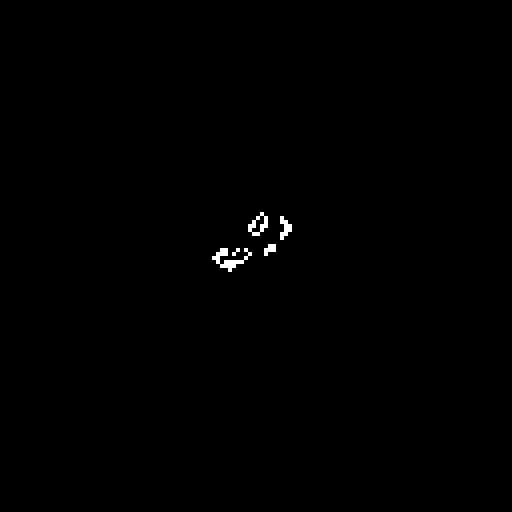

In [143]:
A = life(A)
# `repeat` can be used to get chunky pixels to make the output easier to see
Gray.(repeat(A,inner=(4,4)))